# Quality Assessment for ERA5 Drought Indicator

Production date: DD-MM-YYYY

*Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.*

Produced by: C3S2521 

## 🌍 Use case: Use case listed here in full 

## ❓ Quality assessment question
* **In most cases there should be one question listed here in bold**
* **(In some cases a second related/follow-up question may be included)**

**‘Context paragraph’ (no title/heading)** - a very short introduction before the assessment statement describing approach taken to answer the user question. One or two key references could be useful,  if the assessment summarises literature . These can be referenced directly in the text, like `[Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2)` giving: [Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2). For major references numerical labels like this should be used (which should also listed at the end) `Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2))`giving: Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2)). Please use DOI links where possible.


## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Finding 1
* Finding 2
* Finding 3
* etc
```

## 📋 Methodology

A ‘free text’ introduction to the data analysis steps or a description of the literature synthesis, with a justification of the approach taken, and limitations mentioned. **Mention which CDS catalogue entry is used, including a link, and also any other entries used for the assessment**.

Followed by a numbered list of the methodology and results, with the same headings as the sections under ‘Analysis and Results’. These should be links to the sections below, using the format `[](section-label)`. The title of the section will be automatically populated, so no need to repeat the title of the section when referecing it like this.

```{note}
The section labels for the links need to be manually set, as seen below (`(section-1)=`, followed by the heading). These labels will be shown in GitHub but will not appear when the Jupyter Book page is built.
```

* These headings can be specific to the quality assessment, and help guide the user through the ‘story’ of the assessment. This means we cannot pre-define the sections and headings here, as they will be different for each assessment.
* Sub-bullets could be used to outline what will be done/shown/discussed in each section
* The list below is just an example, or may need more or fewer sections, with different headings

E.g. 'The analysis and results are organised in the following steps, which are detailed in the sections below:' 

**[](section-1)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-2)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-3)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-4)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.
 
**[](section-5)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

Any further notes on the method could go here (explanations, caveats or limitations).

## 📈 Analysis and results

(section-1)=
### 1. Section 1 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (**if code is included** - some assessment may review literature or reports like PQARs for ECVs, in which case, a markdown file could be provided instead). Note that some details may be better placed in code comments, rather than in the text above the code cell, to help the flow of the Notebook.

**Code:**

* Cell output should be cleaned up as needed (right click the cell after it has run and delete the output if needed), this can also be done with the `'hide-output'` cell tag, added under 'Common Tools -> Cell Tags' on the right in Jupyter Lab (under the cog icon).
* Please consider when cell output would be useful to include, such as printing the summary of the xarray data cube, or an example image. 
* Please link to any non-standard libraries in the references, including the functions from B-Open (a standard line on this is included in the references section).
* The code cells will be adjusted to be 'collapsed by default' when the Jupyter Book page is built.

In [2]:
# Input / Output
from pathlib import Path
import earthkit.data as ekd
import warnings

# General data handling
import numpy as np
import pandas as pd
import xarray as xr
from functools import partial

# Visualisation
import earthkit.plots as ekp
from earthkit.plots.styles import Style
import matplotlib.pyplot as plt
plt.rcParams["grid.linestyle"] = "--"
from tqdm import tqdm  # Progress bars

# Visualisation in Jupyter book -- automatically ignored otherwise
try:
    from myst_nb import glue
except ImportError:
    glue = None

import calendar
import earthkit.data
import scipy.stats as stats    

(section-2)=
### ERA5-Drought SPI

#### Reading in data from ERA5-Drought
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

#### Using Earthkit for plotting.

In [ ]:
global_map = data_drought.sel(time="2023-08-01")
fig = ekp.Figure(rows=1, columns=1, size=(5,5)) # Create the figure with dimensions.
subplot = fig.add_map(domain="Europe") # Put in a panel (add_map).
subplot.grid_cells(global_map, z="SPEI12") # Same as pcolormesh. Dataset, Variable.
subplot.legend(location="right")
    
fig.land() 
fig.coastlines()
fig.borders()
fig.gridlines()

# Play around with the ensemble members- how to calculate standard uncertainty between all?
# Creating a filtering function? Say if you wanted to select a range of longitudes and latitudes.
# Creating an animated gif with ensemble members? A slider?

In [ ]:
# Try timeseries for a subset of time.

# time_series = data_drought.sel(time = ["2023-01-01","2023-12-31"],lat=51.5, lon=0.0, method="nearest") # Only plots two datapoints.

time_series = data_drought.sel(lat=25, lon=0.0, method="nearest")
time_series["pzero"].plot.line() 
time_series = data_drought.sel(time="2023-01-01",method="nearest")
global_mean = time_series["SPEI1"].mean() # Global mean has been successfully computed, but it's still a lazy Dask array
print(global_mean.compute()) # Triggers to print computation.
time_series["SPEI1"].plot.pcolormesh() # Why did I need to squeeze the dimension here? -> because there can be multiple measurements in a day.

# Yearly average at each pixel.
global_mean = data_drought["SPEI12"].mean("time") # Calculates mean along time axis.
fig = ekp.Figure(rows=1, columns=1, size=(5,5)) # Create the figure with dimensions.
subplot = fig.add_map(domain="Europe") # Put in a panel (add_map).
subplot.grid_cells(global_mean, z="SPEI12") # Same as pcolormesh. Dataset, Variable.
subplot.legend(location="right")
    
fig.land() 
fig.coastlines()
fig.borders()
fig.gridlines()

#### Calculating SPI



#### Read in total precipitation data (monthly means) from ERA5 analysis. 
##### (https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means?tab=download)

In [2]:
reanal_dataset = "reanalysis-era5-single-levels-monthly-means"
reanal_request = {
    "product_type": [
        "monthly_averaged_reanalysis"
    ],
    "variable": ["total_precipitation"],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived"
}

In [3]:
era5_monthly_mean_reanal = ekd.from_source("cds", reanal_dataset, reanal_request) # Sends request for this dataset to CDS.
era5_monthly_mean_reanal = era5_monthly_mean_reanal.to_xarray(compat="equals")  # Converts to xarray.Dataset

In [14]:
def process_precipitation(data, var='tp', acc_periods=[1, 3, 6, 12, 24, 36, 48], time_dim=None):
    """
    Full workflow:
    1. Convert precipitation from meters to millimeters.
    2. Compute monthly totals (accounting for days in month).
    3. Add rolling accumulation windows on monthly totals.

    Parameters:
        data (xr.Dataset): Dataset with a time dimension ('valid_time' or 'forecast_reference_time') and variable var.
        var (str): Original variable name (e.g., 'tp').
        acc_periods (list): List of accumulation periods in months.
        time_dim (str): Name of the time dimension. If None, auto-detects between 'valid_time' and 'forecast_reference_time'.

    Returns:
        xr.Dataset: Dataset with tp_mm, tp_mm_monthly_total, and accumulation variables.
    """
    # Detect time dimension if not provided
    if time_dim is None:
        if 'valid_time' in data.dims:
            time_dim = 'valid_time'
        elif 'forecast_reference_time' in data.dims:
            time_dim = 'forecast_reference_time'
        else:
            raise ValueError("No valid time dimension found. Expected 'valid_time' or 'forecast_reference_time'.")

    # Ensure time is sorted
    data = data.sortby(time_dim)

    # Step 1: Convert to mm
    data['tp_mm'] = data[var] * 1000

    # Step 2: Compute monthly totals
    time_index = pd.to_datetime(data[time_dim].values)
    days_in_month = xr.DataArray(
        time_index.days_in_month,
        coords={time_dim: data[time_dim]},
        dims=[time_dim]
    )
    data['tp_mm_monthly_total'] = data['tp_mm'] * days_in_month

    # Step 3: Add rolling accumulation windows
    for period in acc_periods:
        rolling_sum = data['tp_mm_monthly_total'].rolling({time_dim: period}, center=False).sum()
        data[f'tp_mm_accum_{period}m'] = rolling_sum

    return data

def process_pev(data, var='pev', acc_periods=[1, 3, 6, 12, 24, 36, 48]):
    """
    Full workflow:
    1. Convert precipitation from meters to millimeters.
    2. Compute monthly totals (accounting for days in month).
    3. Add rolling accumulation windows on monthly totals.
    
    Parameters:
        data (xr.Dataset): Dataset with time dimension 'valid_time' and variable var.
        var (str): Original variable name (e.g., 'tp').
        acc_periods (list): List of accumulation periods in months.
    
    Returns:
        xr.Dataset: Dataset with tp_mm, tp_mm_monthly_total, and accumulation variables.
    """
    # Ensure time is sorted
    data = data.sortby('forecast_reference_time')
    
    # Step 1: Convert to mm
    data['tp_mm'] = data[var] * 1000
    
    # Step 2: Compute monthly totals
    time_index = pd.to_datetime(data['forecast_reference_time'].values)
    days_in_month = xr.DataArray(
        time_index.days_in_month,
        coords={'forecast_reference_time': data['forecast_reference_time']},
        dims=['forecast_reference_time']
    )
    data['tp_mm_monthly_total'] = data['tp_mm'] * days_in_month
    
    # Step 3: Add rolling accumulation windows
    for period in acc_periods:
        rolling_sum = data['tp_mm_monthly_total'].rolling(forecast_reference_time=period, center=False).sum()
        data[f'tp_mm_accum_{period}m'] = rolling_sum
    
    return data

#### Calculate moving average for different accumulation periods.

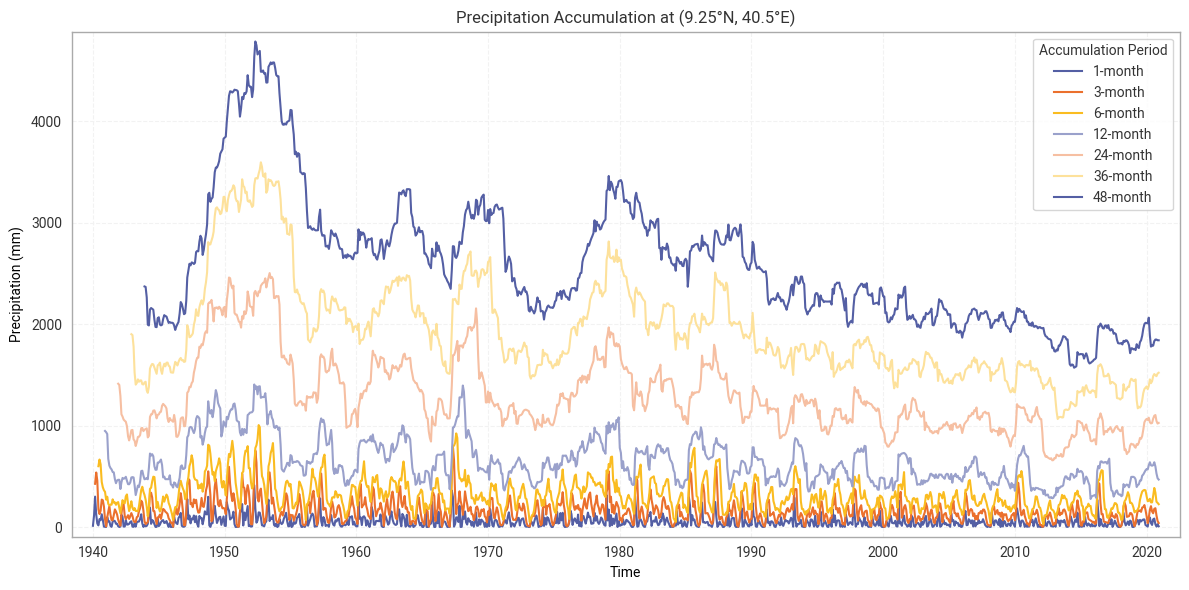

In [5]:
# Assume your dataset is called `data` and already has tp_mm and accumulation variables
# Example accumulation periods
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = era5_monthly_sum_reanal.sel(
    latitude=9.25, longitude=40.5, method='nearest'
).sel(valid_time=slice("1940-01-01", "2020-12-31"))

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'tp_mm_accum_{p}m'
    plt.plot(point_ds['valid_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Precipitation Accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Functions to fit gamma distribution (over calendar months) to different accumulation periods.

In [18]:
def fit_monthly_gamma_distributions_xr(data, accum_periods, start_ref, end_ref):
    """
    Fit gamma distributions for each month and accumulation period using xarray.
    """
    gamma_monthly_params = {}
    
    # Slice reference period
    ref_data = data.sel(forecast_reference_time=slice(start_ref, end_ref))
    
    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'
        for month in range(1, 13):
            
            # Select month subset
            month_subset = ref_data[var_name].where(ref_data['forecast_reference_time.month'] == month, drop=True)
            
            # Drop NaNs and flatten
            values = month_subset.values.flatten()
            values = values[~np.isnan(values)]
            if len(values) > 0:
                alpha, loc, beta = stats.gamma.fit(values)
                gamma_monthly_params[(month, period)] = (alpha, loc, beta)
                
    return gamma_monthly_params

def compute_monthly_spi_series_xr(data, accum_periods, gamma_monthly_params):
    """
    Compute SPI time series for each accumulation period using fitted gamma parameters.
    Returns an xarray Dataset with SPI variables.
    """
    spi_vars = {}
    cdf_vars = {}
    
    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'
        
        spi_array = xr.full_like(data[var_name], np.nan)
        cdf_array = xr.full_like(data[var_name], np.nan)

        for month in range(1, 13):
            
            alpha, loc, beta = gamma_monthly_params[(month, period)]
            
            # Select month subset
            month_mask = data['forecast_reference_time.month'] == month
            values = data[var_name].where(month_mask)
            
            # Compute CDF and SPI
            cdf = stats.gamma.cdf(values, a=alpha, loc=loc, scale=beta)
            spi = stats.norm.ppf(cdf, loc=0, scale=1)
            pdf = stats.gamma.pdf(values, a=alpha, loc=loc, scale=beta)
            
            # Assign values to arrays
            spi_array = spi_array.where(~month_mask, spi)
            cdf_array = cdf_array.where(~month_mask, cdf)

        spi_vars[f'SPI_{period}m'] = spi_array
        cdf_vars[f'CDF_{period}m'] = cdf_array

    return xr.Dataset(spi_vars, coords=data.coords), xr.Dataset(cdf_vars, coords=data.coords)

def compute_spi_dataset(data, accum_periods, n_points = 1000):

    """
    Fit gamma distribution for each month and accumulation period,
    then compute SPI, CDF, and PDF for a linspace of precipitation values.
    
    Parameters
    ----------
    data : xarray.Dataset
        Dataset containing precipitation variables like 'tp_mm_accum_{period}m'.
    accum_periods : list
        List of accumulation periods (e.g., [1, 3, 6]).
    n_points : int
        Number of points in the linspace for precipitation values.
    
    Returns
    -------
    xr.Dataset
        Dataset with SPI, CDF, PDF arrays for each month and accumulation period.
    """

    result_vars = {}

    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'
        
        tp_values = data[var_name]

        # Prepare storage lists
        spi_list, cdf_list, pdf_list, precip_list = [], [], [], []

        for month in range(1, 13):
            # Select month subset
            month_data = tp_values.where(tp_values['valid_time.month'] == month, drop=True).values
            month_data = month_data[month_data > 0]                
            month_data = month_data[~np.isnan(month_data)]

                
            # Fit gamma distribution
            alpha, loc, beta = stats.gamma.fit(month_data, floc=0)

            vals = np.linspace(month_data.min(), month_data.max(), n_points)

            # Compute PDF, CDF, SPI
            cdf_vals = stats.gamma.cdf(vals, a=alpha, loc=loc, scale=beta)
            spi_vals = stats.norm.ppf(cdf_vals)
            pdf_vals = stats.gamma.pdf(vals, a=alpha, loc=loc, scale=beta)

            # Append to lists
            precip_list.append(vals)
            spi_list.append(spi_vals)
            cdf_list.append(cdf_vals)
            pdf_list.append(pdf_vals)

            
        # Convert lists to DataArrays
        months = np.arange(1, 13)
        result_vars[f'precip_{period}m'] = xr.DataArray(precip_list, dims=['month', 'value_index'], coords={'month': months})
        result_vars[f'SPI_{period}m'] = xr.DataArray(spi_list, dims=['month', 'value_index'], coords={'month': months})
        result_vars[f'CDF_{period}m'] = xr.DataArray(cdf_list, dims=['month', 'value_index'], coords={'month': months})
        result_vars[f'PDF_{period}m'] = xr.DataArray(pdf_list, dims=['month', 'value_index'], coords={'month': months})

    return xr.Dataset(result_vars)


#### Fit gamma distribution (over calendar months) to different accumulation periods.

In [62]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

start_ref, end_ref  = "1991-01-01", "2020-12-01"

# Fit gamma distributions
gamma_params = fit_monthly_gamma_distributions_xr(point_ds, accum_periods, start_ref, end_ref)

In [81]:
point_ds

<xarray.Dataset> Size: 93kB
Dimensions:              (valid_time: 972)
Coordinates:
  * valid_time           (valid_time) datetime64[ns] 8kB 1940-01-01T06:00:00 ...
    number               int64 8B ...
    latitude             float64 8B 9.25
    longitude            float64 8B 40.5
    expver               (valid_time) <U4 16kB dask.array<chunksize=(972,), meta=np.ndarray>
Data variables:
    tp                   (valid_time) float32 4kB dask.array<chunksize=(148,), meta=np.ndarray>
    tp_mm                (valid_time) float32 4kB dask.array<chunksize=(148,), meta=np.ndarray>
    tp_mm_monthly_total  (valid_time) float64 8kB dask.array<chunksize=(148,), meta=np.ndarray>
    tp_mm_accum_1m       (valid_time) float64 8kB dask.array<chunksize=(148,), meta=np.ndarray>
    tp_mm_accum_3m       (valid_time) float64 8kB dask.array<chunksize=(150,), meta=np.ndarray>
    tp_mm_accum_6m       (valid_time) float64 8kB dask.array<chunksize=(153,), meta=np.ndarray>
    tp_mm_accum_12m      (valid_time) float64 8kB dask.array<chunksize=(159,), meta=np.ndarray>
    tp_mm_accum_24m      (valid_time) float64 8kB dask.array<chunksize=(171,), meta=np.ndarray>
    tp_mm_accum_36m      (valid_time) float64 8kB dask.array<chunksize=(183,), meta=np.ndarray>
    tp_mm_accum_48m      (valid_time) float64 8kB dask.array<chunksize=(195,), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-26T16:55 GRIB to CDM+CF via cfgrib-0.9.1...

#### Compute SPI series


In [ ]:
# Compute SPI series
spi_ds, cdf_ds = compute_monthly_spi_series_xr(point_ds, accum_periods, gamma_params)

#### Compute SPI, CDF and PDF for a 1000 tp values between max and min.

In [67]:
# Compute SPI, CDF and PDF for each tp value.
ds_tp = compute_spi_dataset(point_ds, accum_periods)

#### Plot either SPI, CDF and PDF for each month for each accumulation window.

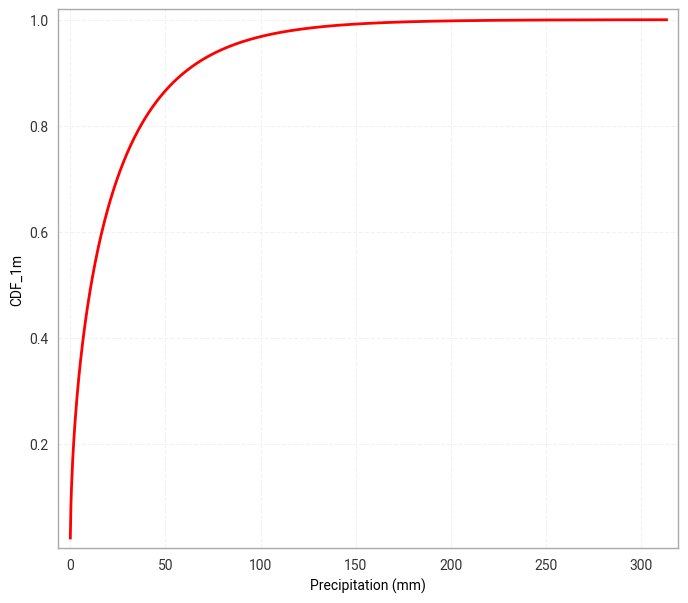

In [78]:
from scipy.interpolate import make_interp_spline

tp_month = ds_tp["precip_1m"].sel(month=1).values
var_month = ds_tp["CDF_1m"].sel(month=1).values

plt.plot(tp_month, var_month, color="red", linewidth=2)
plt.xlabel("Precipitation (mm)")
plt.ylabel("CDF_1m")
# plt.ylim([0,1])
plt.grid(True) 

#TODO: Might be good to have some dropdowns so users can look at the month / accumulation period of choice.

#### Real distribution of preciptiations (ref period) with fitted gamma distribution (CDF, SPI vs Precipitation).

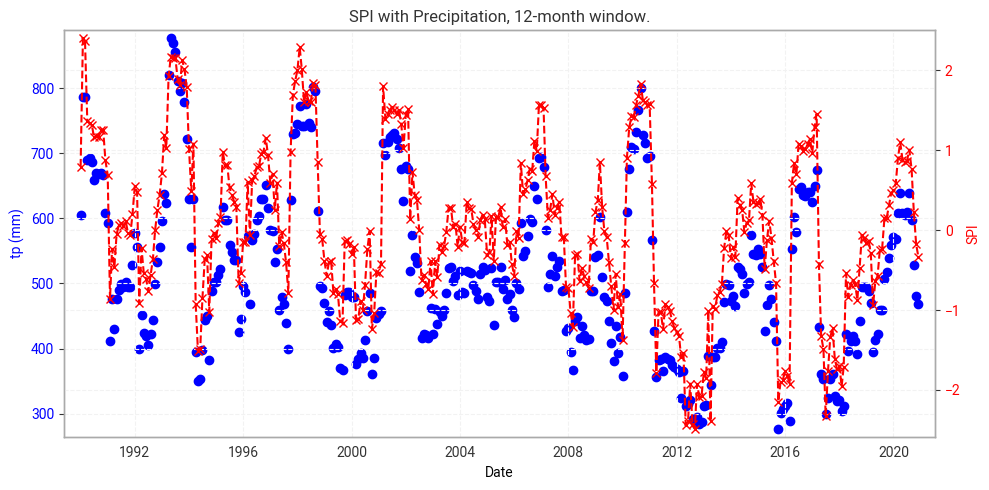

In [92]:
month_choice = 12
tp_choice = point_ds[f"tp_mm_accum_{month_choice}m"].sel(valid_time=slice("1990-01-01", "2020-12-31"))
spi_choice = spi_ds[f"SPI_{month_choice}m"].sel(valid_time=slice("1990-01-01", "2020-12-31"))
cdf_choice = cdf_ds[f"CDF_{month_choice}m"].sel(valid_time=slice("1990-01-01", "2020-12-31"))

fig, ax1 = plt.subplots(figsize=(10, 5))

# First axis (left)
color1 = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('tp (mm)', color=color1)
ax1.scatter(tp_choice.valid_time, tp_choice.values, color=color1, linestyle='-', marker='o', label='DF Ref')
ax1.tick_params(axis='y', labelcolor=color1)

# Second axis (right)
ax2 = ax1.twinx()  # Create second y-axis
color2 = "red"
ax2.set_ylabel('SPI', color=color2)
ax2.plot(spi_choice.valid_time, spi_choice.values, color=color2, linestyle='--', marker='x', label='SPI Ref')
ax2.tick_params(axis='y', labelcolor=color2)

# Title and grid
plt.title(f'SPI with Precipitation, {month_choice}-month window.')
fig.tight_layout()
plt.show()


#### Calculating historical ratio of months without precipitation and finding zero adjusted SPI (ref dataset)

In [155]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

def zero_precip_monthly_xr(data, cdf_spi_ds, accum_periods, start_ref="1991-01-01", end_ref="2020-12-01"):
    """
    Adjust CDF for zero precipitation probability in xarray.
    
    Parameters:
        data (xr.Dataset): Original dataset with accumulation variables.
        cdf_spi_ds (xr.Dataset): Dataset with CDF values for SPI.
        accum_periods (list): Accumulation periods in months.
        start_ref, end_ref (str): Reference period for zero-precip stats.
    
    Returns:
        stats_summary_df (pd.DataFrame): Summary stats for zero precipitation.
        adjusted_cdf_ds (xr.Dataset): Dataset with adjusted CDF values.
    """
    # Slice reference period
    ref_data = data.sel(valid_time=slice(start_ref, end_ref))
    
    adjusted_cdf_vars = {}
    stats_summary = []

    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'
        cdf_var = f'CDF_{period}m'
        adjusted_cdf = cdf_spi_ds[cdf_var].copy()

        for month in range(1, 13):
            # Select month subset
            month_subset = ref_data[var_name].where(ref_data['valid_time.month'] == month, drop=True)
            n_zero = (month_subset == 0).sum().compute().item()
            n_month = month_subset.count().compute().item()

            # Probability of zero precipitation
            p_zero = (n_zero + 1) / (2 * (n_month + 1))
            
            ratio_zero = n_zero / n_month

            # Adjust CDF for this month
            mask = data['valid_time.month'] == month
            adjusted_cdf = adjusted_cdf.where(~mask, p_zero + (1 - p_zero) * cdf_spi_ds[cdf_var])

            # Append summary
            stats_summary.append({
                "Month": month,
                "SPI": period,
                "Zero-Precip Count": int(n_zero),
                "Total Months": int(n_month),
                "Prob Zero Precip": p_zero,
                "Historical Ratio": ratio_zero,
            })

        adjusted_cdf_vars[cdf_var] = adjusted_cdf

    stats_summary_df = pd.DataFrame(stats_summary)
    adjusted_cdf_ds = xr.Dataset(adjusted_cdf_vars, coords=data.coords)

    return stats_summary_df, adjusted_cdf_ds

In [153]:
stats_sum, adjusted_cdf_ds = zero_precip_monthly_xr(point_ds, cdf_ds, accum_periods)

In [154]:
stats_sum[stats_sum["SPI"]==1]

,Month,SPI,Zero-Precip Count,Total Months,Prob Zero Precip,Historical Ratio
0,1,1,2,30,0.048387,0.066667
1,2,1,0,30,0.016129,0.000000
2,3,1,0,30,0.016129,0.000000
3,4,1,0,30,0.016129,0.000000
4,5,1,0,30,0.016129,0.000000
5,6,1,0,30,0.016129,0.000000
6,7,1,0,30,0.016129,0.000000
7,8,1,0,30,0.016129,0.000000
8,9,1,0,30,0.016129,0.000000
9,10,1,0,30,0.016129,0.000000


#### ERA5- Probability of zero precipitation.

In [146]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["probability_of_zero_precipitation_spi"],
    "accumulation_period": [
        "1",
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ]
}

In [147]:
era5_zero_precip = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
era5_zero_precip = era5_zero_precip.to_xarray(compat="equals") # Converts to xarray.
era5_zero_precip.sel(lat=9.25, lon= 40.5).compute()

<xarray.Dataset> Size: 208B
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 96B 2020-01-01 2020-02-01 ... 2020-12-01
    lon      float64 8B 40.5
    lat      float64 8B 9.25
Data variables:
    pzero    (time) float64 96B 0.06452 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.06452
Attributes: (12/19)
    CDI:                     Climate Data Interface version 1.9.10 (https://m...
    Conventions:             CF-1.8
    source:                  DRYFALL v1.0
    institution:             European Centre for Medium-Range Weather Forecasts
    title:                   Quality criteria for the derived standardized dr...
    description:             Monthly quality criteria that define the reliabi...
    ...                      ...
    resolution:              0.25x0.25
    climate_start_date:      1991-01-01
    climate_end_date:        2020-12-31
    frequency:               Monthly
    contact_person:          support@ecmwf.int
    CDO:                     Climate Data Operators version 1.9.10 (https://m...

#### SPI Test of Normality: Shapiro-Wilks Test
##### Quality parameter set to:
##### 0 (rejection) - if p-value < alpha = 0.05, 
##### 1 (accepted) - if p-value > alpha = 0.05.

#### Shapiro-Wilks Test Functions

In [121]:
def shapiro_monthly_test(spi_ds, accum_periods = [1, 3, 6, 12, 24, 36, 48], months = range(1,13)):
    results = []
    # spi_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    spi_ref = spi_ds.sel(valid_time=slice("1990-01-01", "2020-12-31"))
    for period in accum_periods:
        data = spi_ds[f"SPI_{period}m"]
        for month in months:
            month_data = data.where(data.valid_time.dt.month == month, drop=True).values
            month_data = month_data[np.isfinite(month_data)]  # remove inf/-inf

            stat, pval = stats.shapiro(month_data,nan_policy="omit")
            normality = 0 if pval < 0.05 else 1

            results.append((month, period, stat, pval,normality))
        
    # Convert to DataFrame
    df_shapiro_results = pd.DataFrame(results, columns=["Month", "SPI", "Statistic", "P-Value","Normality"])

    return df_shapiro_results

#### Calculated Shapiro-Wilks Test Result

In [142]:
df_shapiro_results = shapiro_monthly_test(spi_ds)

In [143]:
df_shapiro_results = df_shapiro_results.loc[df_shapiro_results["SPI"]==12]
df_shapiro_results

,Month,SPI,Statistic,P-Value,Normality
36,1,12,0.928055,0.000233,0
37,2,12,0.952391,0.004736,0
38,3,12,0.950677,0.003769,0
39,4,12,0.991481,0.884448,1
40,5,12,0.992613,0.931639,1
41,6,12,0.992475,0.926145,1
42,7,12,0.985831,0.524297,1
43,8,12,0.989433,0.759193,1
44,9,12,0.992276,0.917793,1
45,10,12,0.976422,0.145733,1


#### ERA5 Shapiro-Wilks Test 

In [136]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["test_for_normality_spi"],
    "accumulation_period": [
        "12",
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ]
}

In [137]:
quality_spi = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
quality_spi = quality_spi.to_xarray(compat="equals") # Converts to xarray.
quality_spi=quality_spi.sel(lat=9.25,lon=40.5, method="nearest")

2025-11-28 15:50:36,664 WARNING [2025-10-30T00:00:00] Downloading data from this dataset requires that the user be registered with the CDS. The use of the API requires a CDS API key.
2025-11-28 15:50:36,666 INFO Request ID is 882bb620-255f-47ce-8af0-2db2837d78cc
2025-11-28 15:50:36,753 INFO status has been updated to accepted
Recovering from HTTP error [500 Internal Server Error], attempt 1 of 500
Retrying in 120 seconds
2025-11-28 15:53:38,428 INFO status has been updated to successful
                                                                                                                        

#### Caclulated vs ERA5 Shapiro-Wilks Test 

In [138]:
quality_spi["significance"].compute()
# df_shapiro_results
# # quality_spi["significance"].compute()

<xarray.DataArray 'significance' (time: 12)> Size: 96B
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Coordinates:
  * time     (time) datetime64[ns] 96B 2020-01-01 2020-02-01 ... 2020-12-01
    lon      float64 8B 40.5
    lat      float64 8B 9.25
Attributes:
    long_name:  Quality flag that indicates the acceptance of a Shapiro-Wilks...
    units:      1

#### Check calculated SPI against given (one location).

In [129]:
dataset = "derived-drought-historical-monthly"

request1 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}

request2 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1981", "1982", "1983",
        "1984", "1985", "1986",
        "1987", "1988", "1989",
        "1990", "1991", "1992",
        "1993", "1994", "1995",
        "1996", "1997", "1998",
        "1999", "2000", "2001",
        "2002", "2003", "2004",
        "2005", "2006", "2007",
        "2008", "2009", "2010",
        "2011", "2012", "2013",
        "2014", "2015", "2016",
        "2017", "2018", "2019",
        "2020"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75] # Ethiopia
}

In [130]:
data_drought = ekd.from_source("cds", dataset, request1,request2) # Sends request for this dataset to CDS.
data_drought = data_drought.to_xarray(compat="equals") # Converts to xarray.
data_drought = data_drought.sel(lat=9.25,lon=40.5, method="nearest")

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 242.43it/s]
/home/eg6/c3s2-eqc-quality-assessment/.venv/lib/python3.12/site-packages/earthkit/data/readers/netcdf/fieldlist.py:202: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  return xr.open_mfdataset(


In [ ]:
plt.figure(figsize=(12, 6))
accum_periods=[48]
for period in accum_periods:
    # plt.plot(spi_calculated_monthly_shifted[f"SPI{period}"],spi_calculated_monthly_shifted[f"SPI{period}"]-data_drought[f"SPI{period}"], label=f"Calculated-SPI{period}")
    plt.plot(data_drought[f"SPI{period}"], label=f"ERA5_Drought-SPI{period}")
    plt.plot(spi_ds[f"SPI_{period}m"], label=f"Calculated SPI{period}")
    
plt.legend()
plt.title("Standardised Precipitation Index in SPI12")
plt.xlabel("Date")
plt.ylabel("SPI Value")
plt.grid(True)
plt.show()

#### Plotting ERA5 SPI- Ensemble

In [156]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": ["48"],
    "version": "1_0",
    "product_type": ["ensemble_members"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "2023",
        "2024"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
}

In [ ]:
data_drought_ens = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
data_drought_ens = data_drought_ens.to_xarray(compat="equals") # Converts to xarray.

In [ ]:
# data_drought_ens = data_drought_ens.sel(lat=9.25,lon=40.5, method="nearest")
data_drought_ens

#### Function to create the data into ensemble set.

In [159]:
# Function to reshape time into (time=24, ensemble=10)
def make_ensemble(spi):
    arr = np.asarray(spi)  # Convert memoryview or dask chunk to NumPy
    reshaped = arr.reshape(24, 10)
    return reshaped
 
# Apply across all lat/lon
ensemble = xr.apply_ufunc(
    make_ensemble,
    data_drought_ens["SPI48"],  # DataArray with dims (time, lat, lon)
    input_core_dims=[["time"]],
    output_core_dims=[["time", "ensemble"]],
    exclude_dims={"time"},
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
    dask_gufunc_kwargs={"allow_rechunk": True},
    output_sizes={"time": 24, "ensemble": 10},
)
 
# Assign coordinates
ensemble = ensemble.assign_coords({
    "time": pd.date_range("2021-01-01", periods=24, freq="MS"),
    "ensemble": range(1, 11)
})
ensemble.name = "SPI48"

/tmp/ipykernel_516/4268696212.py:8: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ensemble = xr.apply_ufunc(


In [160]:
ensemble_mean = ensemble.mean(dim="ensemble", skipna=True)  # shape: (lat, lon, time)
ensemble_std = ensemble.std(dim="ensemble", skipna=True)  # shape: (lat, lon, time)

In [161]:
ensemble_std = ensemble_std.compute()  # Load into memory for plotting

/home/eg6/c3s2-eqc-quality-assessment/.venv/lib/python3.12/site-packages/dask/array/numpy_compat.py:58: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [162]:
ensemble_mean = ensemble_mean.compute()  # Load into memory for plotting

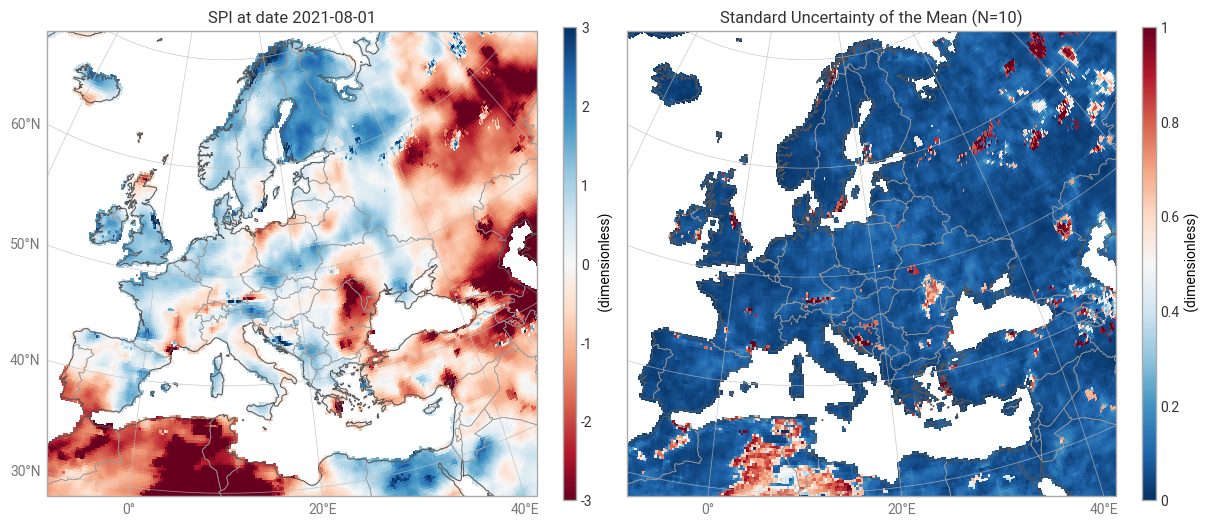

In [164]:
# Select one time slice and one ensemble
from earthkit.plots.styles import Style
SPI_STYLE = Style(cmap=plt.cm.RdBu, vmin=-3, vmax=3, normalize=False)
SPI_SEOM_STYLE = Style(cmap=plt.cm.RdBu_r, vmin=0, vmax=1, normalize=False) # _r for reversing colorbar.

global_std_map = ensemble_std.sel(time="2021-08-01")  # shape (lat, lon)
global_mean_map = ensemble_mean.sel(time="2021-08-01")
# Convert to NumPy arrays

std_values = global_std_map.to_numpy()/np.sqrt(10)
mean_values = global_mean_map.to_numpy()

lat_values = global_mean_map.lat.to_numpy()
lon_values = global_mean_map.lon.to_numpy()
 
# Create meshgrid

lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)
 
# # Plot with EarthKit

# Create figure with 2 columns
fig = ekp.Figure(rows=1, columns=2, size=(12, 6))  # <-- Important!

# First subplot (left)
subplot = fig.add_map(domain="Europe", row=0, column=0)
subplot.grid_cells(mean_values, x=lon_grid, y=lat_grid,style=SPI_STYLE)
subplot.legend(location="right")

# Second subplot (right)
subplot1 = fig.add_map(domain="Europe", row=0, column=1)
subplot1.grid_cells(std_values, x=lon_grid, y=lat_grid, style = SPI_SEOM_STYLE)
subplot1.legend(location="right")

subplot.title("SPI at date 2021-08-01")
subplot1.title("Standard Uncertainty of the Mean (N=10)")

# Add decorations
fig.land()
fig.coastlines()
fig.borders()
fig.gridlines()
fig.show()


#### Calculating SPI- Ensemble

In [178]:
dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_ensemble_members"],
    "variable": ["total_precipitation"],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "grib",
    "download_format": "unarchived"
}


In [181]:
tp_ens = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
tp_ens = tp_ens.to_xarray() # Converts to xarray.
tp_ens = tp_ens.assign_coords(number=tp_ens.number + 1)

In [ ]:
tp_ens

In [ ]:
era5_monthly_sum_ens = process_precipitation(tp_ens.sel(number=1))

#### Calculating SPEI

In [3]:
dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "total_precipitation",
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "grib",
    "download_format": "unarchived"
}

In [4]:
tp_rean_precip = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
tp_rean_precip = tp_rean_precip.to_xarray() # Converts to xarray.

2025-12-08 18:47:42,590 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


In [5]:
tp_rean_precip = tp_rean_precip.sel(
    latitude=9.25, longitude=40.5, method='nearest'
).sel(forecast_reference_time=slice("1940-01-01", "2020-12-31"))

In [6]:
monthly_sum_prec_reanal = process_precipitation(tp_rean_precip)

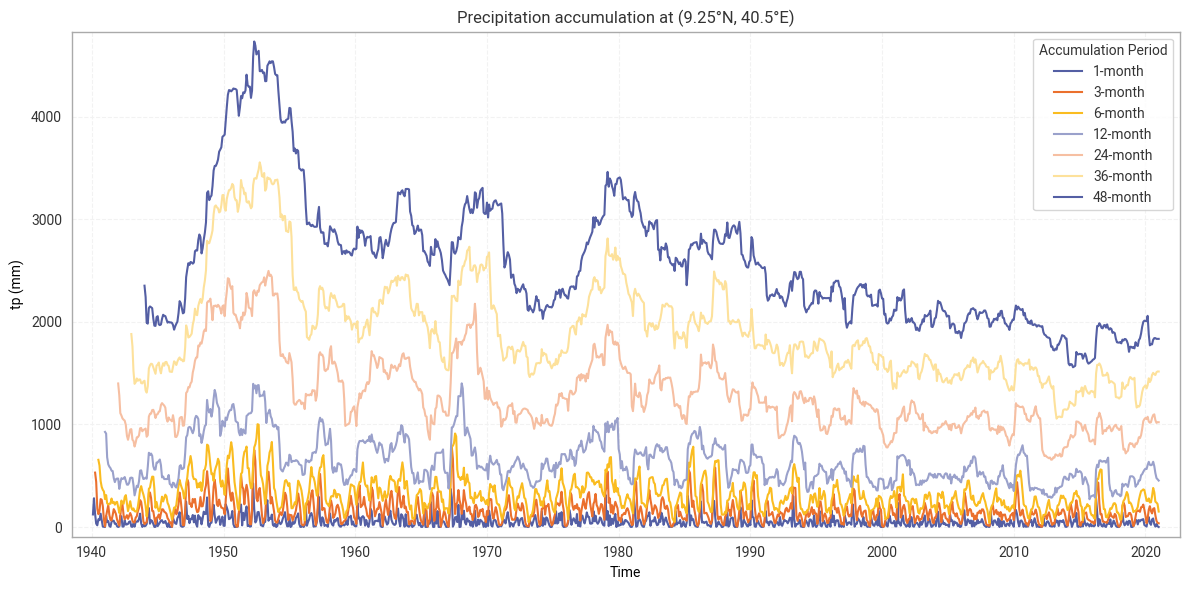

In [7]:
# Assume your dataset is called `data` and already has tp_mm and accumulation variables
# Example accumulation periods
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = monthly_sum_prec_reanal

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'tp_mm_accum_{p}m'
    plt.plot(point_ds['forecast_reference_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Precipitation accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('tp (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "potential_evaporation"
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "grib",
    "download_format": "unarchived"
}

In [9]:
pev_rean = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
pev_rean = pev_rean.to_xarray() # Converts to xarray.

2025-12-08 18:48:18,247 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


In [10]:
# Select the grid point and time slice for Ethiopia
pev_rean = pev_rean.sel(
    latitude=9.25, longitude=40.5, method='nearest'
).sel(forecast_reference_time=slice("1940-01-01", "2020-12-31"))

In [12]:
pev_rean

<xarray.Dataset> Size: 16kB
Dimensions:                  (forecast_reference_time: 972)
Coordinates:
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 8kB 194...
    latitude                 float64 8B 9.25
    longitude                float64 8B 40.5
Data variables:
    pev                      (forecast_reference_time) float64 8kB ...
Attributes: (12/13)
    param:        pev
    paramId:      228251
    class:        ea
    stream:       moda
    levtype:      sfc
    type:         fc
    ...           ...
    date:         19400101
    time:         1800
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

In [15]:
monthly_sum_pev_reanal = process_pev(pev_rean, var="pev")

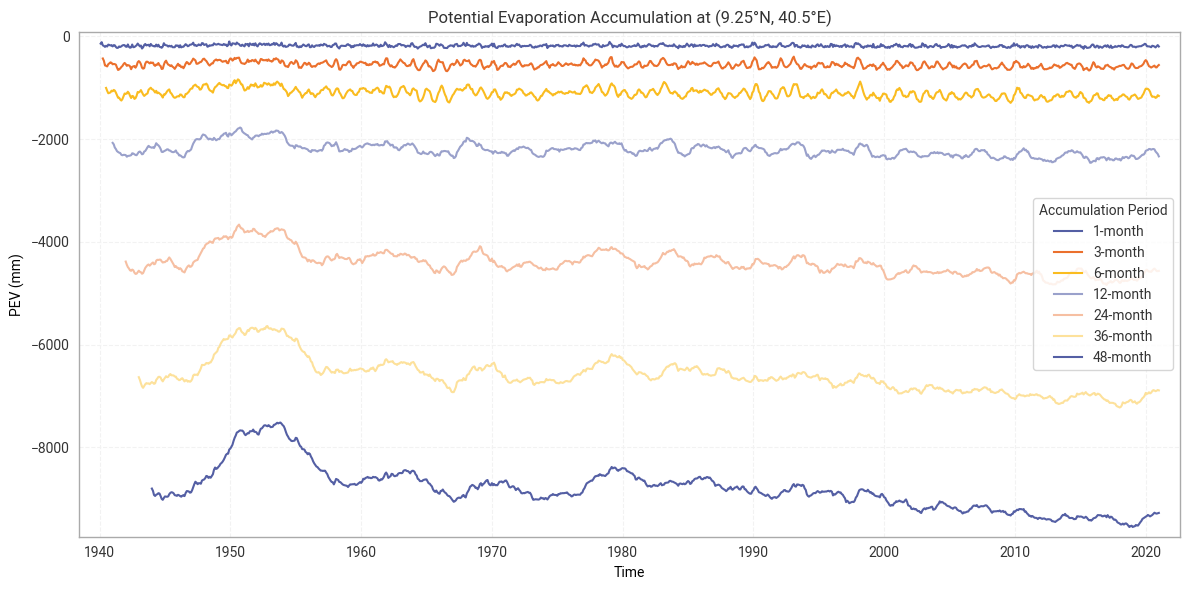

In [16]:
# Assume your dataset is called `data` and already has tp_mm and accumulation variables
# Example accumulation periods
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = monthly_sum_pev_reanal

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'tp_mm_accum_{p}m'
    plt.plot(point_ds['forecast_reference_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Potential Evaporation Accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('PEV (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Plot of PET

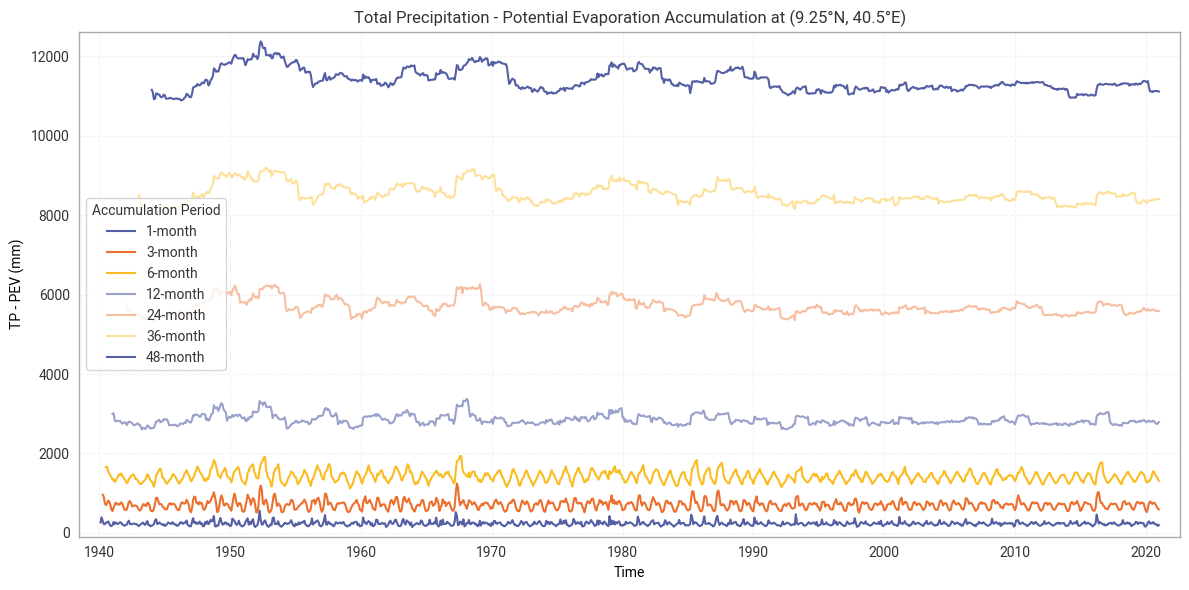

In [36]:
monthly_diff = monthly_sum_prec_reanal-monthly_sum_pev_reanal

# Assume your dataset is called `data` and already has tp_mm and accumulation variables
# Example accumulation periods
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = monthly_diff

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'tp_mm_accum_{p}m'
    plt.plot(point_ds['forecast_reference_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Total Precipitation - Potential Evaporation Accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('TP - PEV (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Fit Gamma Distribution to PET

In [19]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

start_ref, end_ref  = "1991-01-01", "2020-12-01"

# Fit gamma distributions
gamma_params = fit_monthly_gamma_distributions_xr(point_ds, accum_periods, start_ref, end_ref)

In [31]:
# Compute SPI series
spei_ds, cdf_ds = compute_monthly_spi_series_xr(point_ds, accum_periods, gamma_params)

In [22]:
dataset = "derived-drought-historical-monthly"
request1 = {
    "variable": ["standardised_precipitation_evapotranspiration_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}

request2 = {
    "variable": ["standardised_precipitation_evapotranspiration_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}


In [32]:
data_spei = ekd.from_source("cds", dataset, request1,request2) # Sends request for this dataset to CDS.
data_spei = data_spei.to_xarray(compat="equals") # Converts to xarray.
data_spei = data_spei.sel(lat=9.25,lon=40.5, method="nearest")

2025-12-08 21:21:40,484 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
100%|█████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 47.60it/s]
/home/eg6/c3s2-eqc-quality-assessment/.venv/lib/python3.12/site-packages/earthkit/data/readers/netcdf/fieldlist.py:202: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  return xr.open_mfdataset(


In [35]:
spei_ds

<xarray.Dataset> Size: 16kB
Dimensions:                  (forecast_reference_time: 972)
Coordinates:
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 8kB 194...
    latitude                 float64 8B 9.25
    longitude                float64 8B 40.5
Data variables:
    SPI_48m                  (forecast_reference_time) float64 8kB nan ... -0...

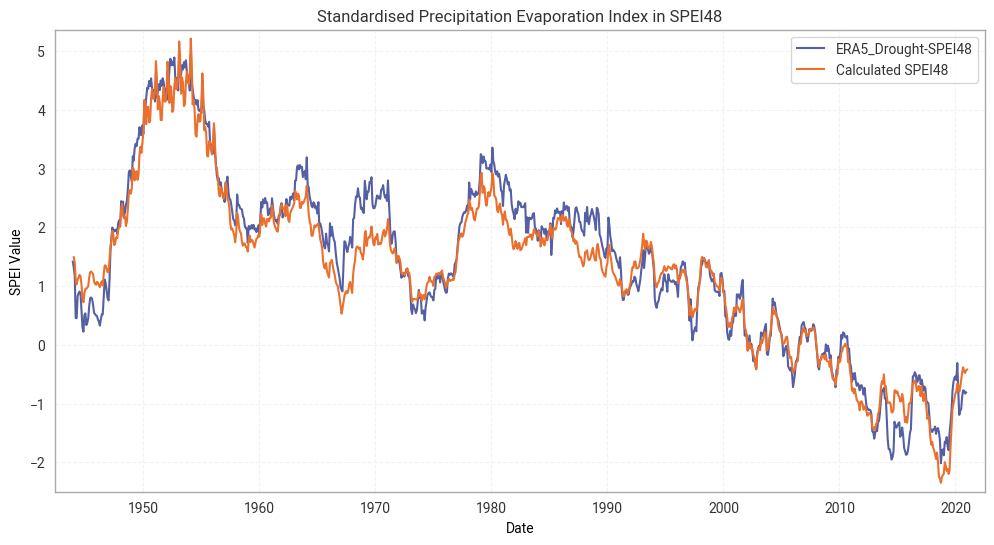

In [43]:
plt.figure(figsize=(12, 6))
accum_periods=[48]
for period in accum_periods:
    # plt.plot(spi_calculated_monthly_shifted[f"SPI{period}"],spi_calculated_monthly_shifted[f"SPI{period}"]-data_drought[f"SPI{period}"], label=f"Calculated-SPI{period}")
    plt.plot(data_spei['time'].values, data_spei[f"SPEI{period}"], label=f"ERA5_Drought-SPEI{period}")
    plt.plot(spei_ds['forecast_reference_time'].values, spei_ds[f"SPI_{period}m"], label=f"Calculated SPEI{period}")
    
plt.legend()
plt.title("Standardised Precipitation Evaporation Index in SPEI48")
plt.xlabel("Date")
plt.ylabel("SPEI Value")
plt.grid(True)
plt.show()

(section-3)=
### 3. Section 3 title
#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

In [ ]:
# collapsable code cells

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

(section-4)=
### 4. Section 4 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does(if code is included).

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

(section-5)=
### 5. Section 5 title 

#### Results Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included). 

If this is the **results section**, we expect the final plots to be created here with a description of how to interpret them, and what information can be extracted for the specific use case and user question. The information in the 'quality assessment statement' should be derived here. 

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

List the references used in the Notebook here.

E.g.

[[1]](https://doi.org/10.1038/s41598-018-20628-2) Rodriguez, D., De Voil, P., Hudson, D., Brown, J. N., Hayman, P., Marrou, H., & Meinke, H. (2018). Predicting optimum crop designs using crop models and seasonal climate forecasts. Scientific reports, 8(1), 2231.